## Questions
- Calculate the total number of customers in each section
- Calculate the total number of customers in each section over time
- Display the number of customers at checkout over time
- Calculate the time each customer spent in the market
- Calculate the total number of customers in the supermarket over time.
- Our business managers think that the first section customers visit follows a different pattern than the following ones. Plot the distribution of customers of their first visited section versus following sections (treat all sections visited after the first as “following”).
- Estimate the total revenue for a customer (section, revenue per minute)

## SETUP

In [101]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px

In [102]:
monday = pd.read_csv("data/monday.csv", sep=";")
tuesday = pd.read_csv("data/tuesday.csv", sep=";")
wednesday = pd.read_csv("data/wednesday.csv", sep=";")
thursday = pd.read_csv("data/thursday.csv", sep=";")
friday = pd.read_csv("data/friday.csv", sep=";")

In [103]:
monday["weekday"] = "monday"
tuesday["weekday"] = "tuesday"
wednesday["weekday"] = "wednesday"
thursday["weekday"] = "thursday"
friday["weekday"] = "friday"

In [104]:
df = monday.append(tuesday, ignore_index=True)
df = df.append(wednesday, ignore_index=True)
df = df.append(thursday, ignore_index=True)
df = df.append(friday, ignore_index=True)
df

,timestamp,customer_no,location,weekday
0,2019-09-02 07:03:00,1,dairy,monday
1,2019-09-02 07:03:00,2,dairy,monday
2,2019-09-02 07:04:00,3,dairy,monday
3,2019-09-02 07:04:00,4,dairy,monday
4,2019-09-02 07:04:00,5,spices,monday
...,...,...,...,...
24872,2019-09-06 21:50:00,1500,dairy,friday
24873,2019-09-06 21:50:00,1507,checkout,friday
24874,2019-09-06 21:50:00,1508,checkout,friday
24875,2019-09-06 21:50:00,1509,drinks,friday


In [105]:
df["timestamp"] = pd.to_datetime(df["timestamp"])
df["hour"] = df["timestamp"].dt.hour
df["minute"] = df["timestamp"].dt.minute
df.head()

,timestamp,customer_no,location,weekday,day,hour,minute
0,2019-09-02 07:03:00,1,dairy,monday,2,7,3
1,2019-09-02 07:03:00,2,dairy,monday,2,7,3
2,2019-09-02 07:04:00,3,dairy,monday,2,7,4
3,2019-09-02 07:04:00,4,dairy,monday,2,7,4
4,2019-09-02 07:04:00,5,spices,monday,2,7,4


## DATA ANALYSIS

## Total number of unique customers in a week

In [71]:
df["customer_no"].nunique()
#1535 unique customers = max. nr of customers in a day

1535

In [154]:
daily_customers = pd.DataFrame(df.groupby("weekday")["customer_no"].nunique())
daily_customers.reset_index(inplace=True)
px.bar(daily_customers, x='weekday', y='customer_no')

## Total number of customers in each section 

In [80]:
total_customers_section = pd.DataFrame(df.groupby("location")["customer_no"].nunique())
total_customers_section.reset_index(inplace=True)
total_customers_section

,location,customer_no
0,checkout,1532
1,dairy,1483
2,drinks,1434
3,fruit,1494
4,spices,1393


In [82]:
px.bar(total_customers_section, x='location', y='customer_no')

## Total number of customers in each section over time

In [164]:
total_customers_time = pd.DataFrame(df.groupby(["location","hour"])["customer_no"].nunique())
total_customers_time.reset_index(inplace=True)
total_customers_time

,location,hour,customer_no
0,checkout,7,101
1,checkout,8,173
2,checkout,9,162
3,checkout,10,154
4,checkout,11,157
...,...,...,...
70,spices,17,141
71,spices,18,166
72,spices,19,183
73,spices,20,145


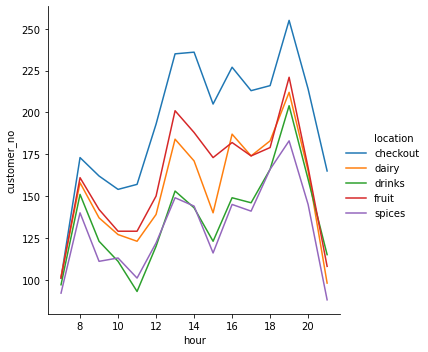

In [165]:
sns.relplot(x="hour", y="customer_no", hue="location", kind="line", data=total_customers_time)

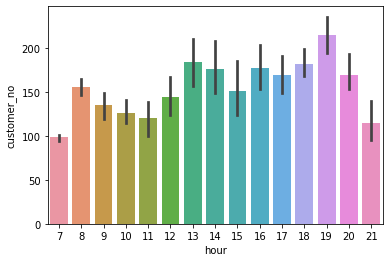

In [166]:
sns.barplot(data=total_customers_time, y='customer_no', x='hour', orient='v')

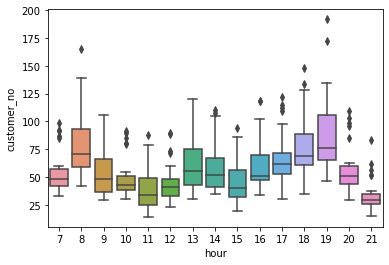

In [34]:
sns.boxplot(data=total_customers_time, y='customer_no', x='hour', orient='v')

In [167]:
px.bar(total_customers_time, x='hour', y='customer_no', color="location")

In [168]:
px.line(total_customers_time, x="hour", y="customer_no", color="location", hover_name="location",line_shape="spline")

In [158]:
total_customers_weekday = pd.DataFrame(df.groupby(["location","weekday"])["customer_no"].nunique())
total_customers_weekday.reset_index(inplace=True)
px.bar(total_customers_weekday, x='weekday', y='customer_no', color="location")

In [21]:
px.bar(total_customers_weekday, x='weekday', y='customer_no', color="location", barmode="group")

In [22]:
px.line(total_customers_weekday, x="weekday", y="customer_no", color="location", hover_name="location",line_shape="spline")

## Number of customers at checkout over time

In [123]:
total_customers_checkout = total_customers_time[total_customers_time["location"] == "checkout"]
total_customers_checkout

,location,weekday,hour,customer_no
0,checkout,friday,7,87
1,checkout,friday,8,132
2,checkout,friday,9,82
3,checkout,friday,10,80
4,checkout,friday,11,79
...,...,...,...,...
70,checkout,wednesday,17,98
71,checkout,wednesday,18,97
72,checkout,wednesday,19,192
73,checkout,wednesday,20,85


In [150]:
total_customers_checkout.groupby("weekday")["customer_no"]

In [130]:
total_customers_checkout_weekday = pd.DataFrame(total_customers_checkout.groupby("weekday")["customer_no"].nunique())
total_customers_checkout_weekday.reset_index(inplace=True)
px.bar(total_customers_checkout_weekday, x="weekday",y="customer_no")

In [147]:
total_customers_checkout_hour = pd.DataFrame(total_customers_checkout.groupby("hour")["customer_no"].nunique())
total_customers_checkout_hour.reset_index(inplace=True)
px.bar(total_customers_checkout_hour, x="hour",y="customer_no")

In [121]:
customer1 = df[df["customer_no"]== 1]
customer1

,timestamp,customer_no,location,weekday,day,hour,minute
0,2019-09-02 07:03:00,1,dairy,monday,2,7,3
8,2019-09-02 07:05:00,1,checkout,monday,2,7,5
4884,2019-09-03 07:02:00,1,fruit,tuesday,3,7,2
4887,2019-09-03 07:05:00,1,drinks,tuesday,3,7,5
4909,2019-09-03 07:12:00,1,checkout,tuesday,3,7,12
9598,2019-09-04 07:00:00,1,fruit,wednesday,4,7,0
9607,2019-09-04 07:02:00,1,checkout,wednesday,4,7,2
14648,2019-09-05 07:00:00,1,drinks,thursday,5,7,0
14652,2019-09-05 07:02:00,1,checkout,thursday,5,7,2
19752,2019-09-06 07:00:00,1,dairy,friday,6,7,0


In [139]:
import numpy as np
#df['date'] = df.groupby('item_id')['date'].apply(lambda x: x.sort_values())
customer1['diff'] = customer1.groupby('customer_no')['timestamp'].diff()
customer1

,timestamp,customer_no,location,weekday,day,hour,minute,diff
0,2019-09-02 07:03:00,1,dairy,monday,2,7,3,NaT
8,2019-09-02 07:05:00,1,checkout,monday,2,7,5,00:02:00
4884,2019-09-03 07:02:00,1,fruit,tuesday,3,7,2,23:57:00
4887,2019-09-03 07:05:00,1,drinks,tuesday,3,7,5,00:03:00
4909,2019-09-03 07:12:00,1,checkout,tuesday,3,7,12,00:07:00
9598,2019-09-04 07:00:00,1,fruit,wednesday,4,7,0,23:48:00
9607,2019-09-04 07:02:00,1,checkout,wednesday,4,7,2,00:02:00
14648,2019-09-05 07:00:00,1,drinks,thursday,5,7,0,23:58:00
14652,2019-09-05 07:02:00,1,checkout,thursday,5,7,2,00:02:00
19752,2019-09-06 07:00:00,1,dairy,friday,6,7,0,23:58:00


In [145]:
df.groupby("customer_no")["location"]